In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium
from pyproj import Transformer
import matplotlib.colors as mcolors




In [7]:
df.columns.tolist()

['sample.sampleDateTime',
 'sample.samplingPoint.easting',
 'sample.samplingPoint.northing',
 'sample.sampledMaterialType.label',
 'Ammonia(N)',
 'BOD ATU',
 'Nitrate-N',
 'Nitrite-N',
 'O Diss %sat',
 'Orthophospht',
 'Phosphorus-P',
 'Temp Water',
 'TurbidityNTU',
 'pH',
 'year',
 'month',
 'day',
 'day_of_week',
 'location_cluster',
 'Ammonia(N)_rolling7',
 'BOD ATU_rolling7',
 'Nitrate-N_rolling7',
 'Nitrite-N_rolling7',
 'O Diss %sat_rolling7',
 'Orthophospht_rolling7',
 'Phosphorus-P_rolling7',
 'Temp Water_rolling7',
 'TurbidityNTU_rolling7',
 'pH_rolling7',
 'Ammonia(N)_lag1',
 'Ammonia(N)_lag2',
 'BOD ATU_lag1',
 'BOD ATU_lag2',
 'Nitrate-N_lag1',
 'Nitrate-N_lag2',
 'Nitrite-N_lag1',
 'Nitrite-N_lag2',
 'O Diss %sat_lag1',
 'O Diss %sat_lag2',
 'Orthophospht_lag1',
 'Orthophospht_lag2',
 'Phosphorus-P_lag1',
 'Phosphorus-P_lag2',
 'Temp Water_lag1',
 'Temp Water_lag2',
 'TurbidityNTU_lag1',
 'TurbidityNTU_lag2',
 'pH_lag1',
 'pH_lag2']

In [9]:
df.head

<bound method NDFrame.head of        sample.sampleDateTime  sample.samplingPoint.easting  \
0        2020-01-02 08:20:00                        512248   
1        2020-01-02 11:25:00                        512242   
2        2020-01-02 11:33:00                        479766   
3        2020-01-02 12:12:00                        271427   
4        2020-01-02 12:27:00                        473010   
...                      ...                           ...   
226226   2024-12-16 10:56:00                        464978   
226227   2024-12-16 11:02:00                        470000   
226228   2024-12-16 11:12:00                        464978   
226229   2024-12-16 11:18:00                        464978   
226230   2024-12-18 09:55:00                        334600   

        sample.samplingPoint.northing sample.sampledMaterialType.label  \
0                              302927                      GROUNDWATER   
1                              302941                      GROUNDWATER   
2  

In [5]:
file_path = '/Users/sofianebelbrik/Documents/water pollution/Data/Preprocessed_Data/final_water_quality_df.csv'
df = pd.read_csv(file_path)

In [10]:
parameters = [
    'Ammonia(N)', 'BOD ATU', 'Nitrate-N', 'Nitrite-N', 
    'O Diss %sat', 'Orthophospht', 'Phosphorus-P', 
    'Temp Water', 'TurbidityNTU', 'pH'
]

In [12]:
print(df.columns)

Index(['sample.sampleDateTime', 'sample.samplingPoint.easting',
       'sample.samplingPoint.northing', 'sample.sampledMaterialType.label',
       'Ammonia(N)', 'BOD ATU', 'Nitrate-N', 'Nitrite-N', 'O Diss %sat',
       'Orthophospht', 'Phosphorus-P', 'Temp Water', 'TurbidityNTU', 'pH',
       'year', 'month', 'day', 'day_of_week', 'location_cluster',
       'Ammonia(N)_rolling7', 'BOD ATU_rolling7', 'Nitrate-N_rolling7',
       'Nitrite-N_rolling7', 'O Diss %sat_rolling7', 'Orthophospht_rolling7',
       'Phosphorus-P_rolling7', 'Temp Water_rolling7', 'TurbidityNTU_rolling7',
       'pH_rolling7', 'Ammonia(N)_lag1', 'Ammonia(N)_lag2', 'BOD ATU_lag1',
       'BOD ATU_lag2', 'Nitrate-N_lag1', 'Nitrate-N_lag2', 'Nitrite-N_lag1',
       'Nitrite-N_lag2', 'O Diss %sat_lag1', 'O Diss %sat_lag2',
       'Orthophospht_lag1', 'Orthophospht_lag2', 'Phosphorus-P_lag1',
       'Phosphorus-P_lag2', 'Temp Water_lag1', 'Temp Water_lag2',
       'TurbidityNTU_lag1', 'TurbidityNTU_lag2', 'pH_lag1', 'p

In [14]:
df.head()


sample.sampleDateTime  sample.samplingPoint.easting  \
0   2020-01-02 08:20:00                        512248   
1   2020-01-02 11:25:00                        512242   
2   2020-01-02 11:33:00                        479766   
3   2020-01-02 12:12:00                        271427   
4   2020-01-02 12:27:00                        473010   

   sample.samplingPoint.northing sample.sampledMaterialType.label  Ammonia(N)  \
0                         302927                      GROUNDWATER      0.1525   
1                         302941                      GROUNDWATER      0.1525   
2                         150096    RIVER / RUNNING SURFACE WATER      0.1525   
3                          47251    RIVER / RUNNING SURFACE WATER      0.0300   
4                         140000    RIVER / RUNNING SURFACE WATER      0.0300   

   BOD ATU  Nitrate-N  Nitrite-N  O Diss %sat  Orthophospht  ...  \
0      1.7     15.895    0.07885         89.4         0.021  ...   
1      2.8     15.895    0.07885         89.4         0.021  ...   
2      2.8     15.895    0.07885         89.4         0.021  ...   
3      2.8      2.690    0.00510        100.0         0.021  ...   
4      2.8      2.690    0.00510         88.4         0.021  ...   

   Orthophospht_lag1  Orthophospht_lag2  Phosphorus-P_lag1  Phosphorus-P_lag2  \
0              0.021              0.021              0.037              0.037   
1              0.021              0.021              0.037              0.037   
2              0.021              0.021              0.037              0.037   
3              0.021              0.021              0.037              0.037   
4              0.021              0.021              0.037              0.037   

   Temp Water_lag1  Temp Water_lag2  TurbidityNTU_lag1  TurbidityNTU_lag2  \
0             10.5             10.5                5.0                5.0   
1             10.5             10.5                5.0                5.0   
2             10.5             10.5                5.0                5.0   
3              8.6              8.6                5.0                5.0   
4              9.9              9.9                5.0                5.0   

   pH_lag1  pH_lag2  
0     7.36     7.36  
1     7.36     7.36  
2     7.36     7.36  
3     7.60     7.60  
4     7.74     7.74  

[5 rows x 49 columns]

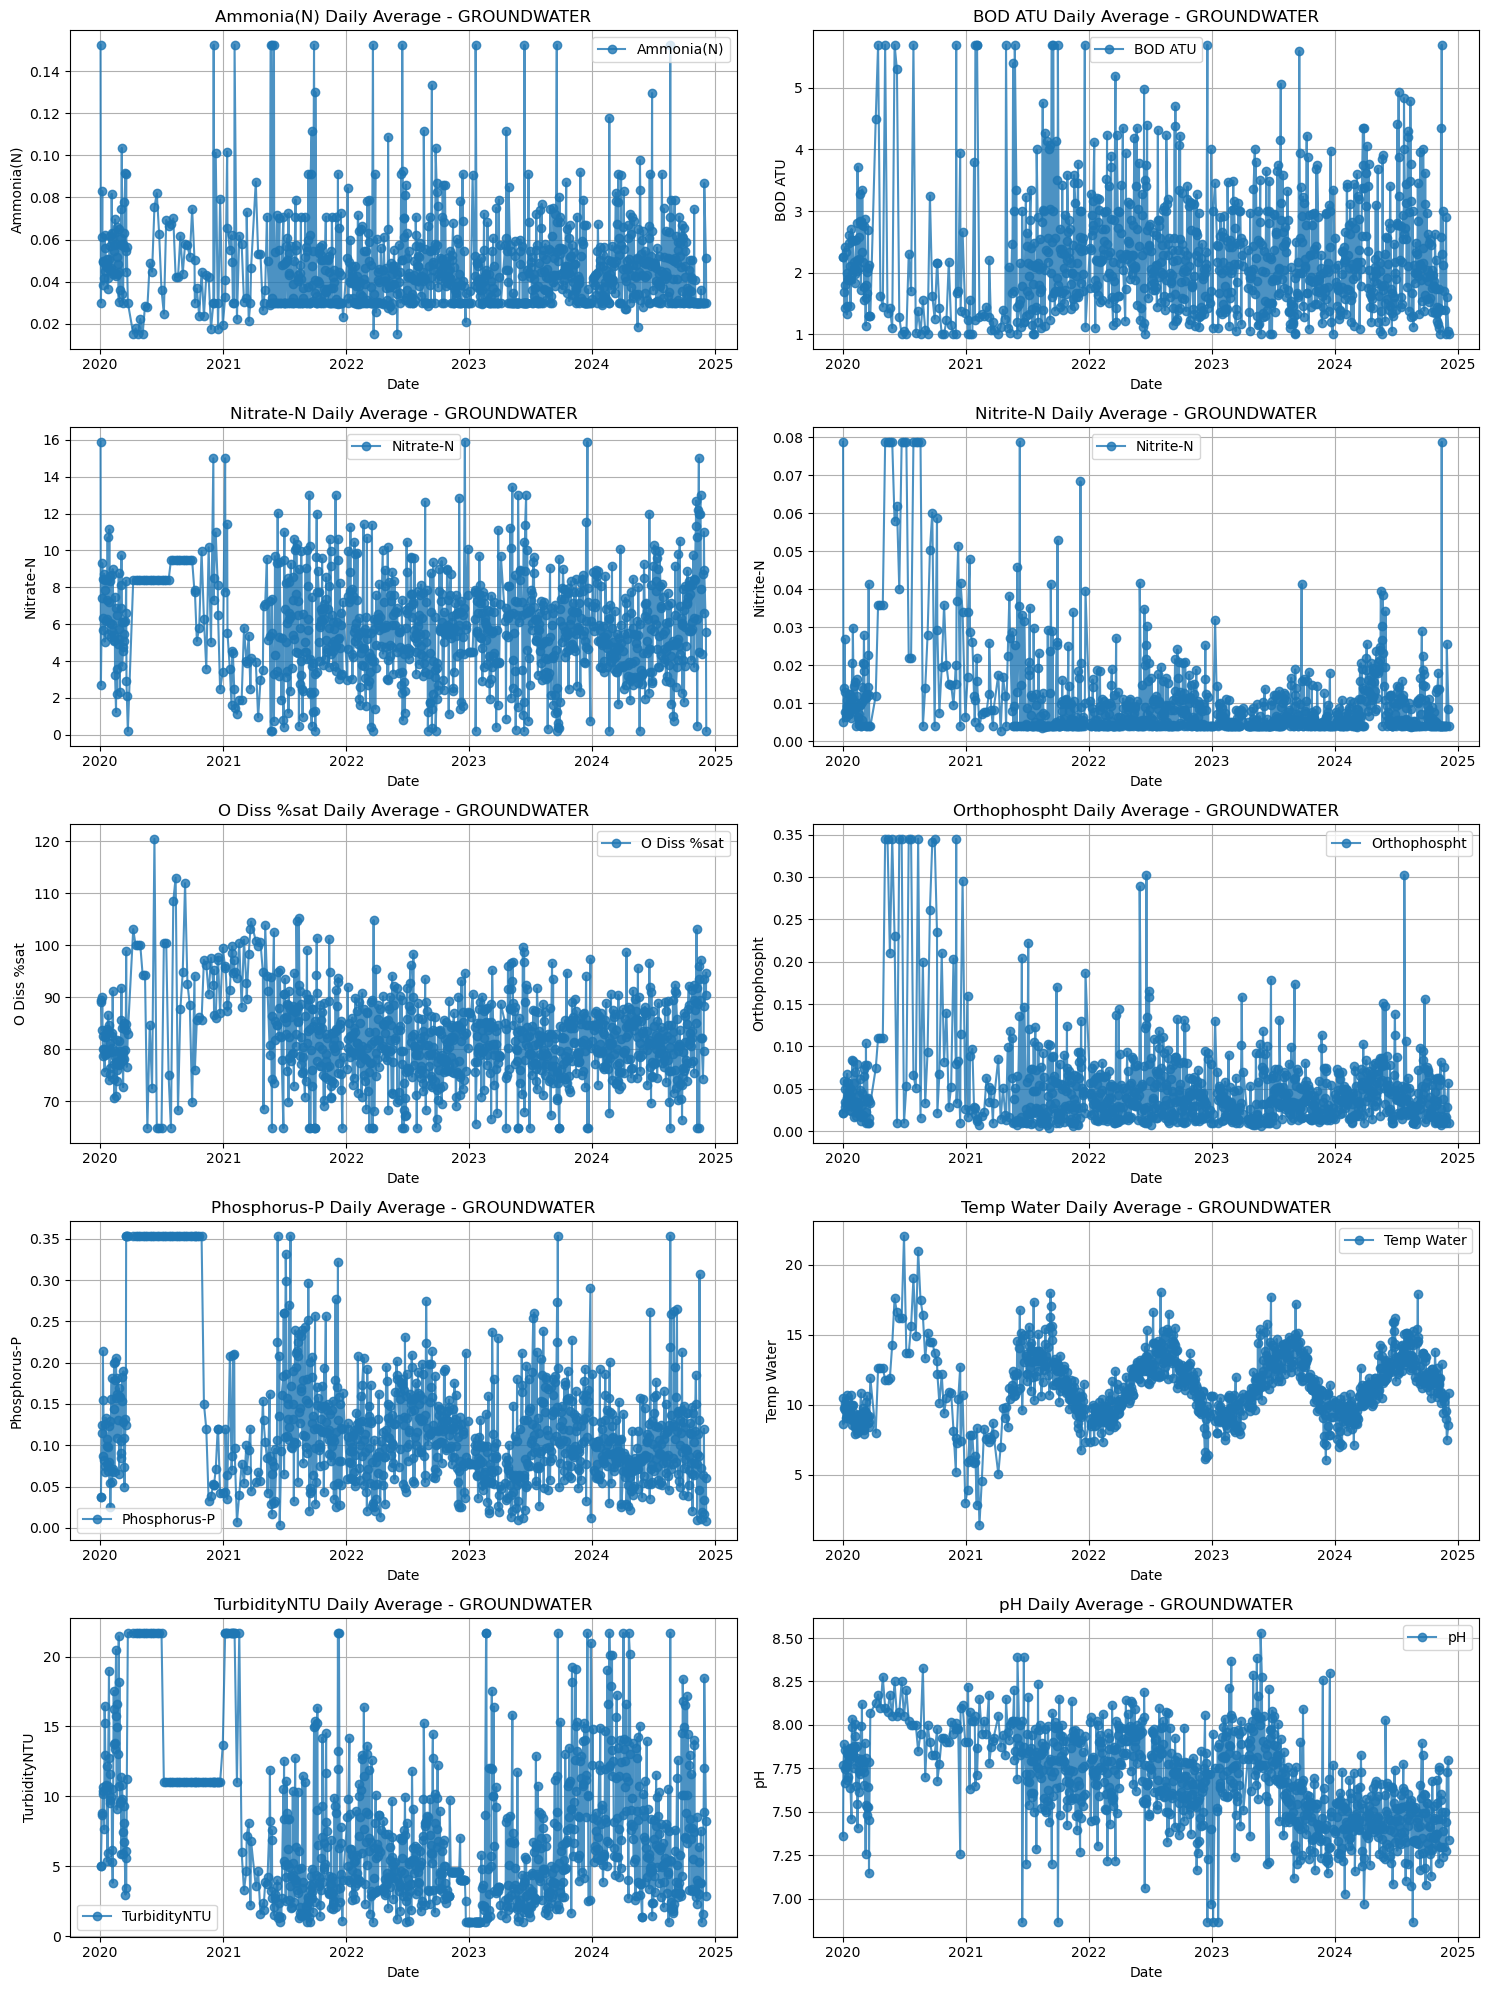

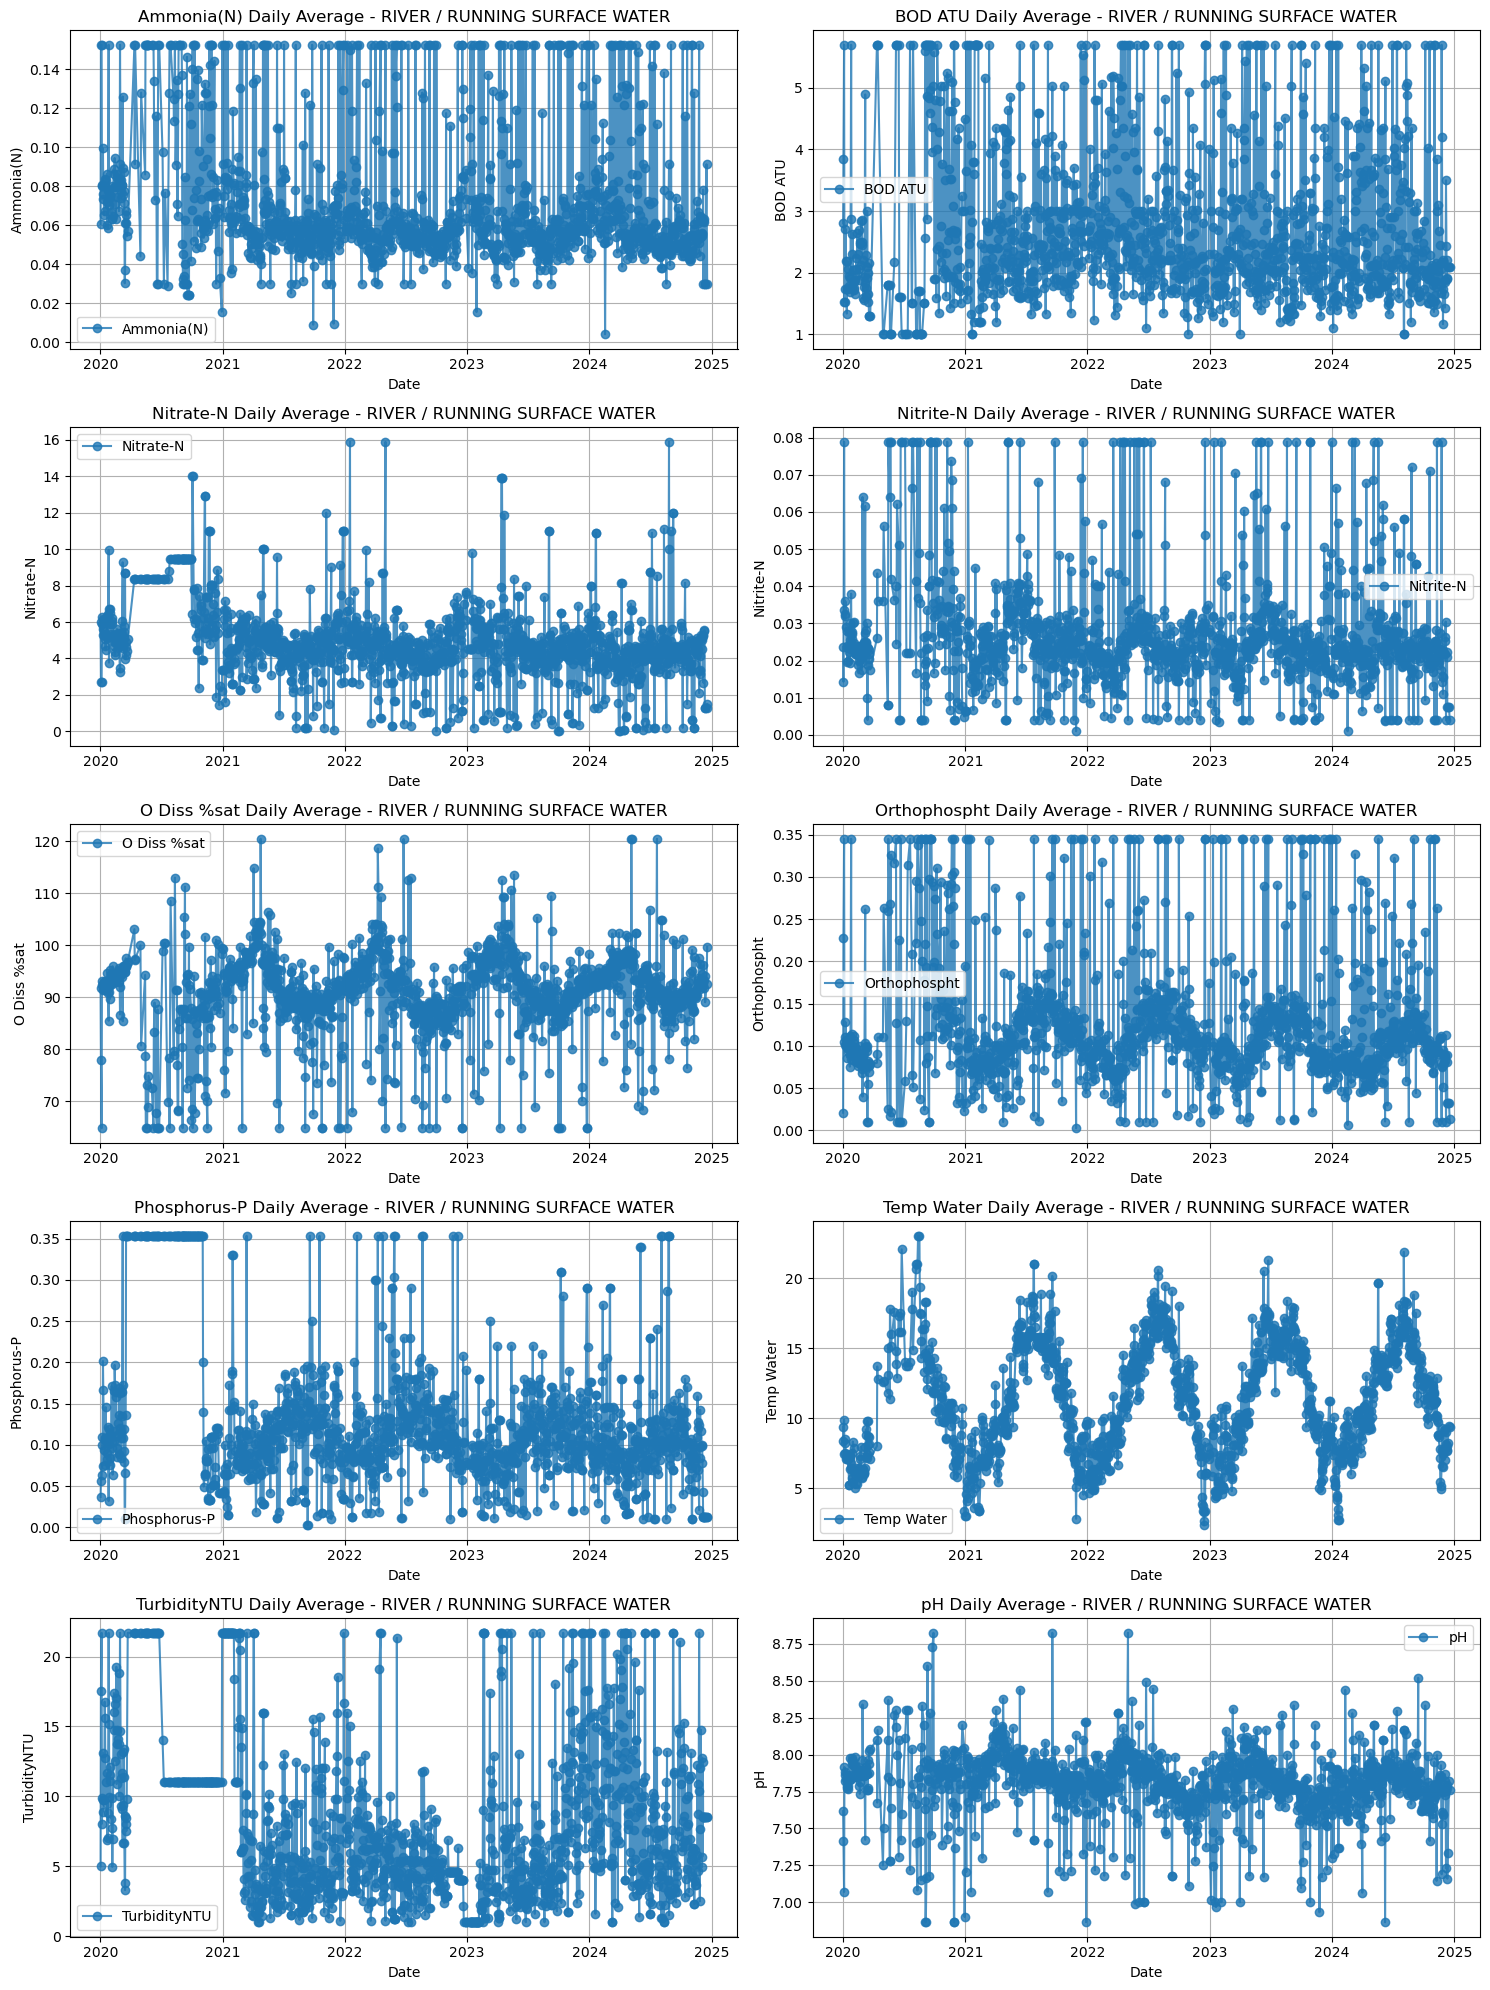

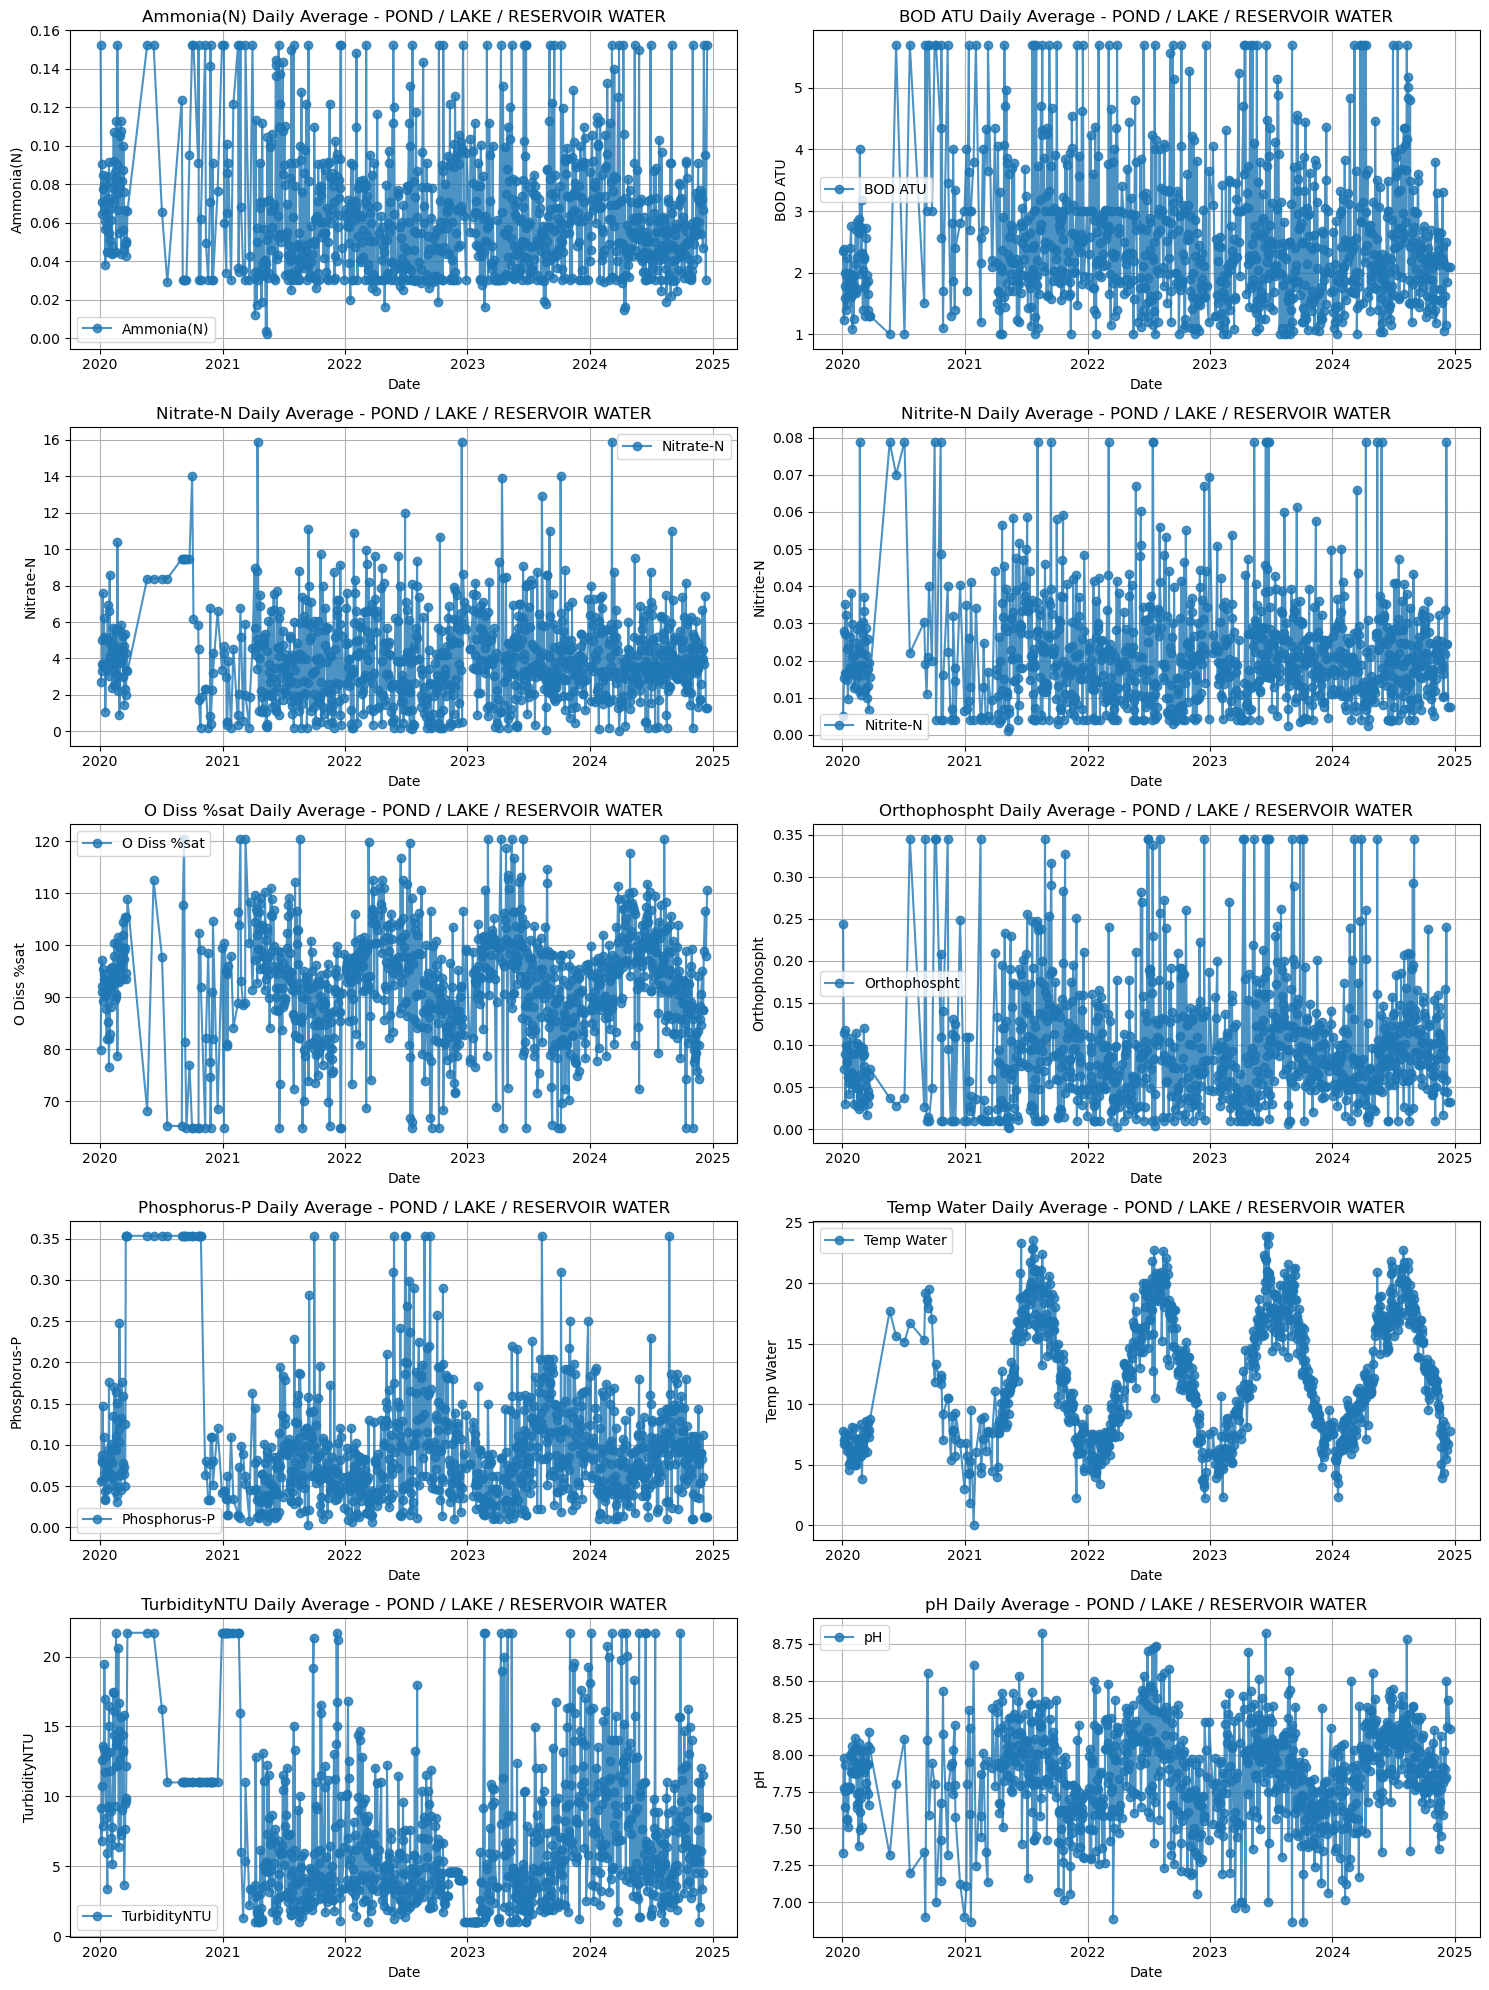

In [16]:

# Step 1: Combine 'year', 'month', and 'day' into a single datetime column.
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Step 2: Sort the DataFrame by date (and optionally by water type) to ensure chronological order.
df = df.sort_values(['date', 'sample.sampledMaterialType.label'])

# Step 3: Group by both 'date' and water type and compute the average for each parameter.
daily_df = df.groupby(['date', 'sample.sampledMaterialType.label'])[parameters].mean().reset_index()

# Step 4: Identify the unique water types.
water_types = daily_df['sample.sampledMaterialType.label'].unique()

# Step 5: For each water type, plot daily trends for each parameter.
for water_type in water_types:
    # Subset the data for this water type.
    subset = daily_df[daily_df['sample.sampledMaterialType.label'] == water_type]
    
    # Create a grid of subplots (e.g., 5 rows x 2 columns if you have 10 parameters).
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    axs = axs.flatten()  # Flatten the array for easier iteration.
    
    # Loop through each parameter and plot its daily average trend.
    for i, param in enumerate(parameters):
        axs[i].plot(subset['date'], subset[param], marker='o', linestyle='-', alpha=0.8, label=param)
        axs[i].set_title(f'{param} Daily Average - {water_type}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(param)
        axs[i].legend()
        axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()

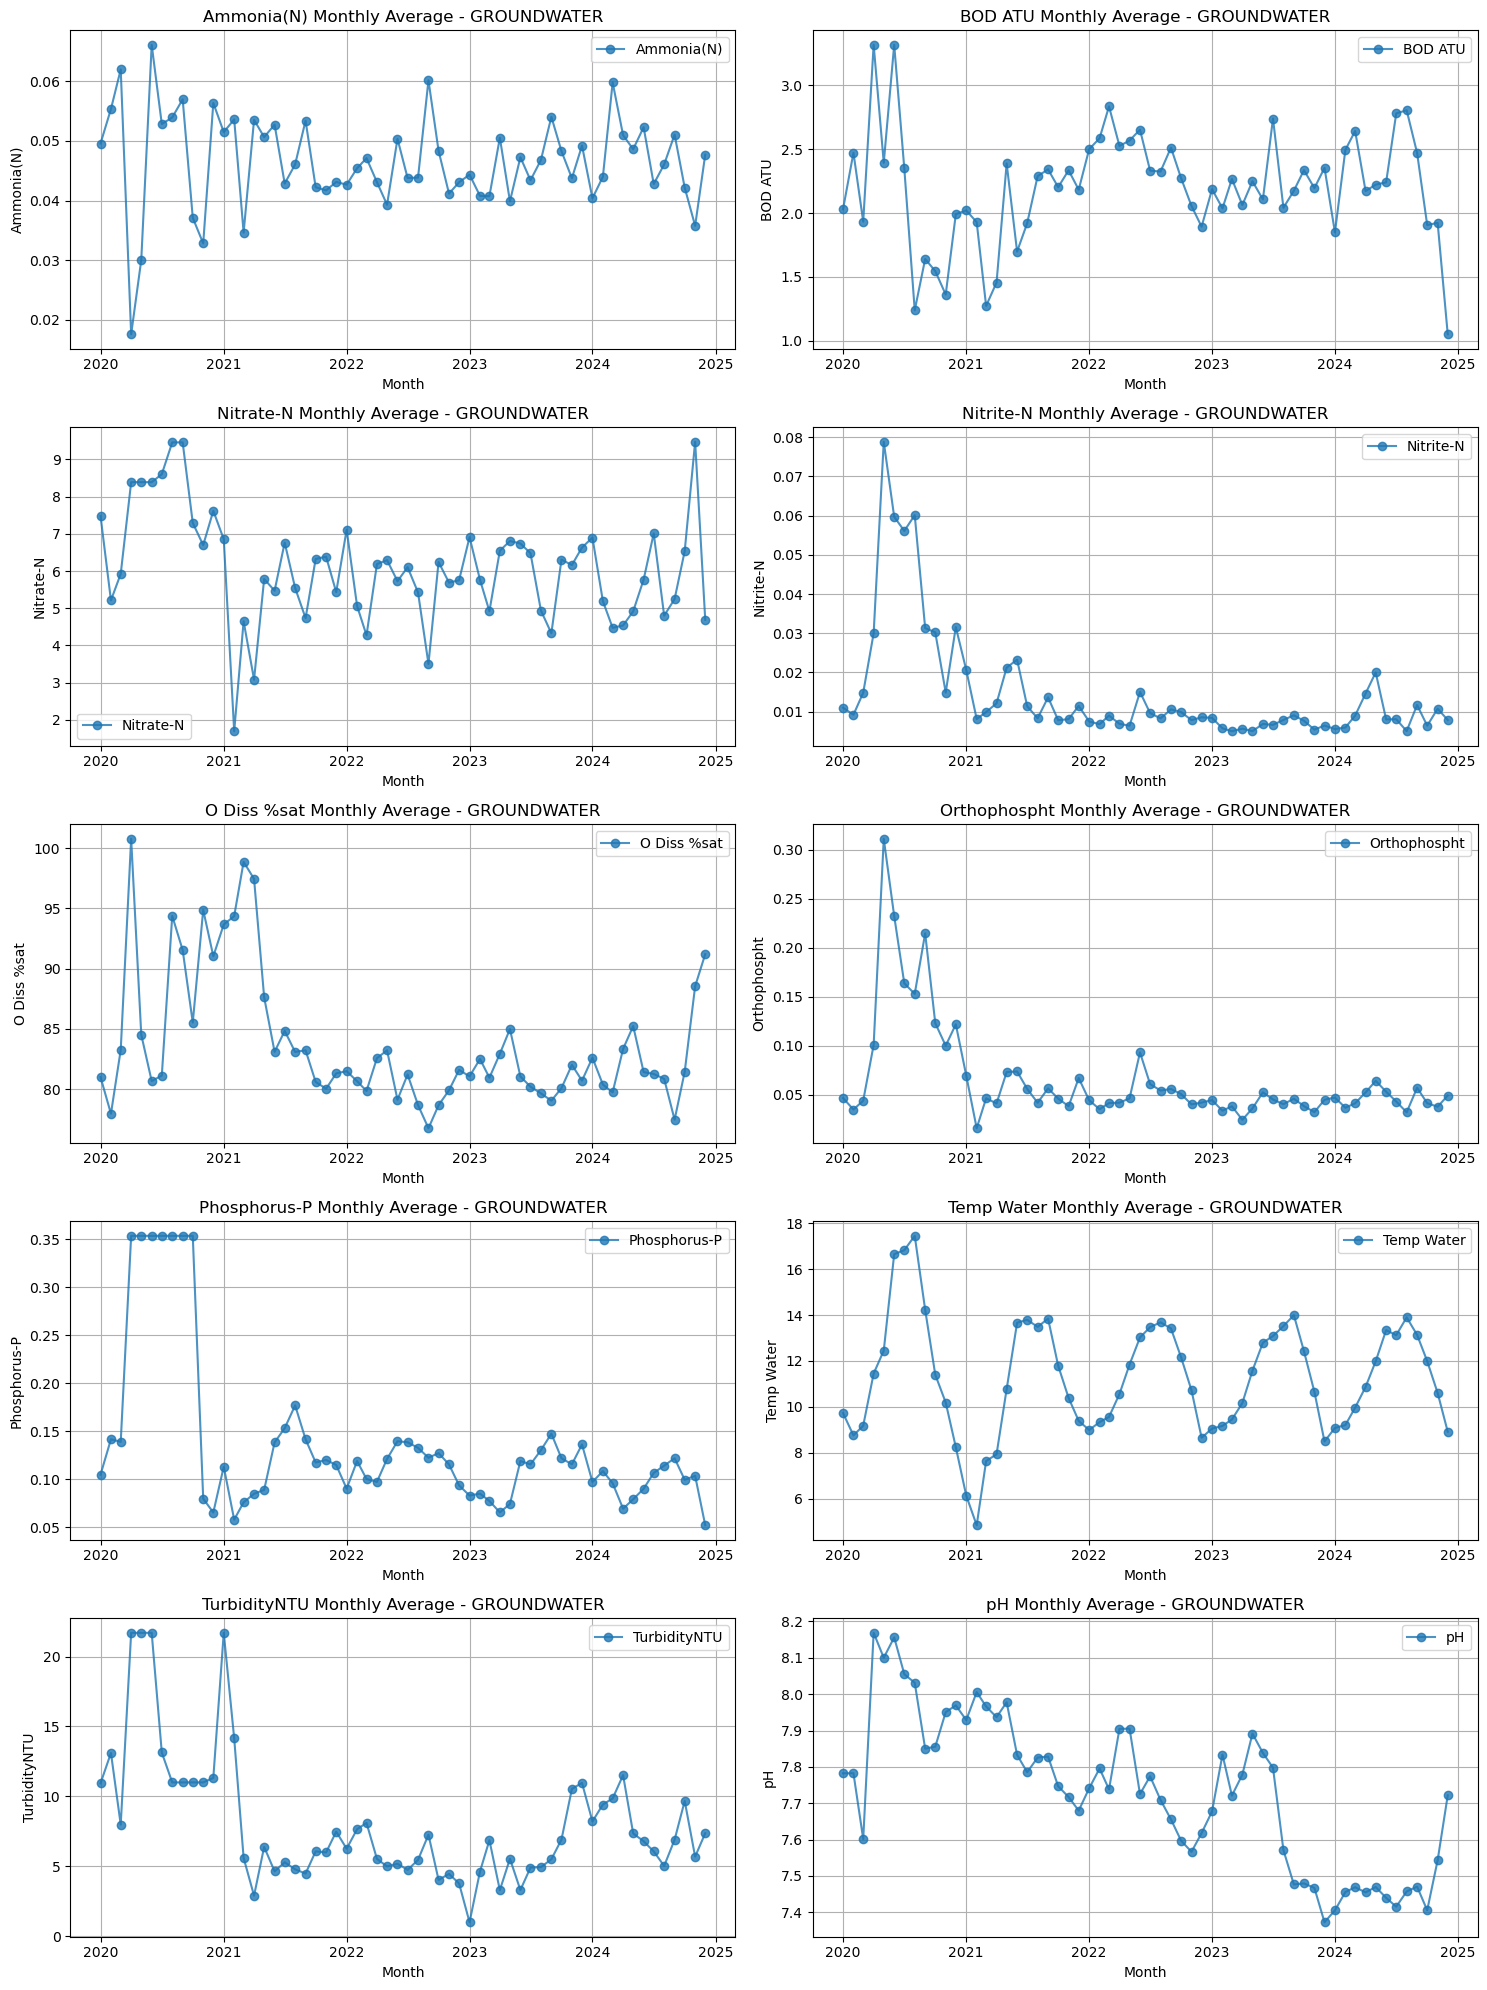

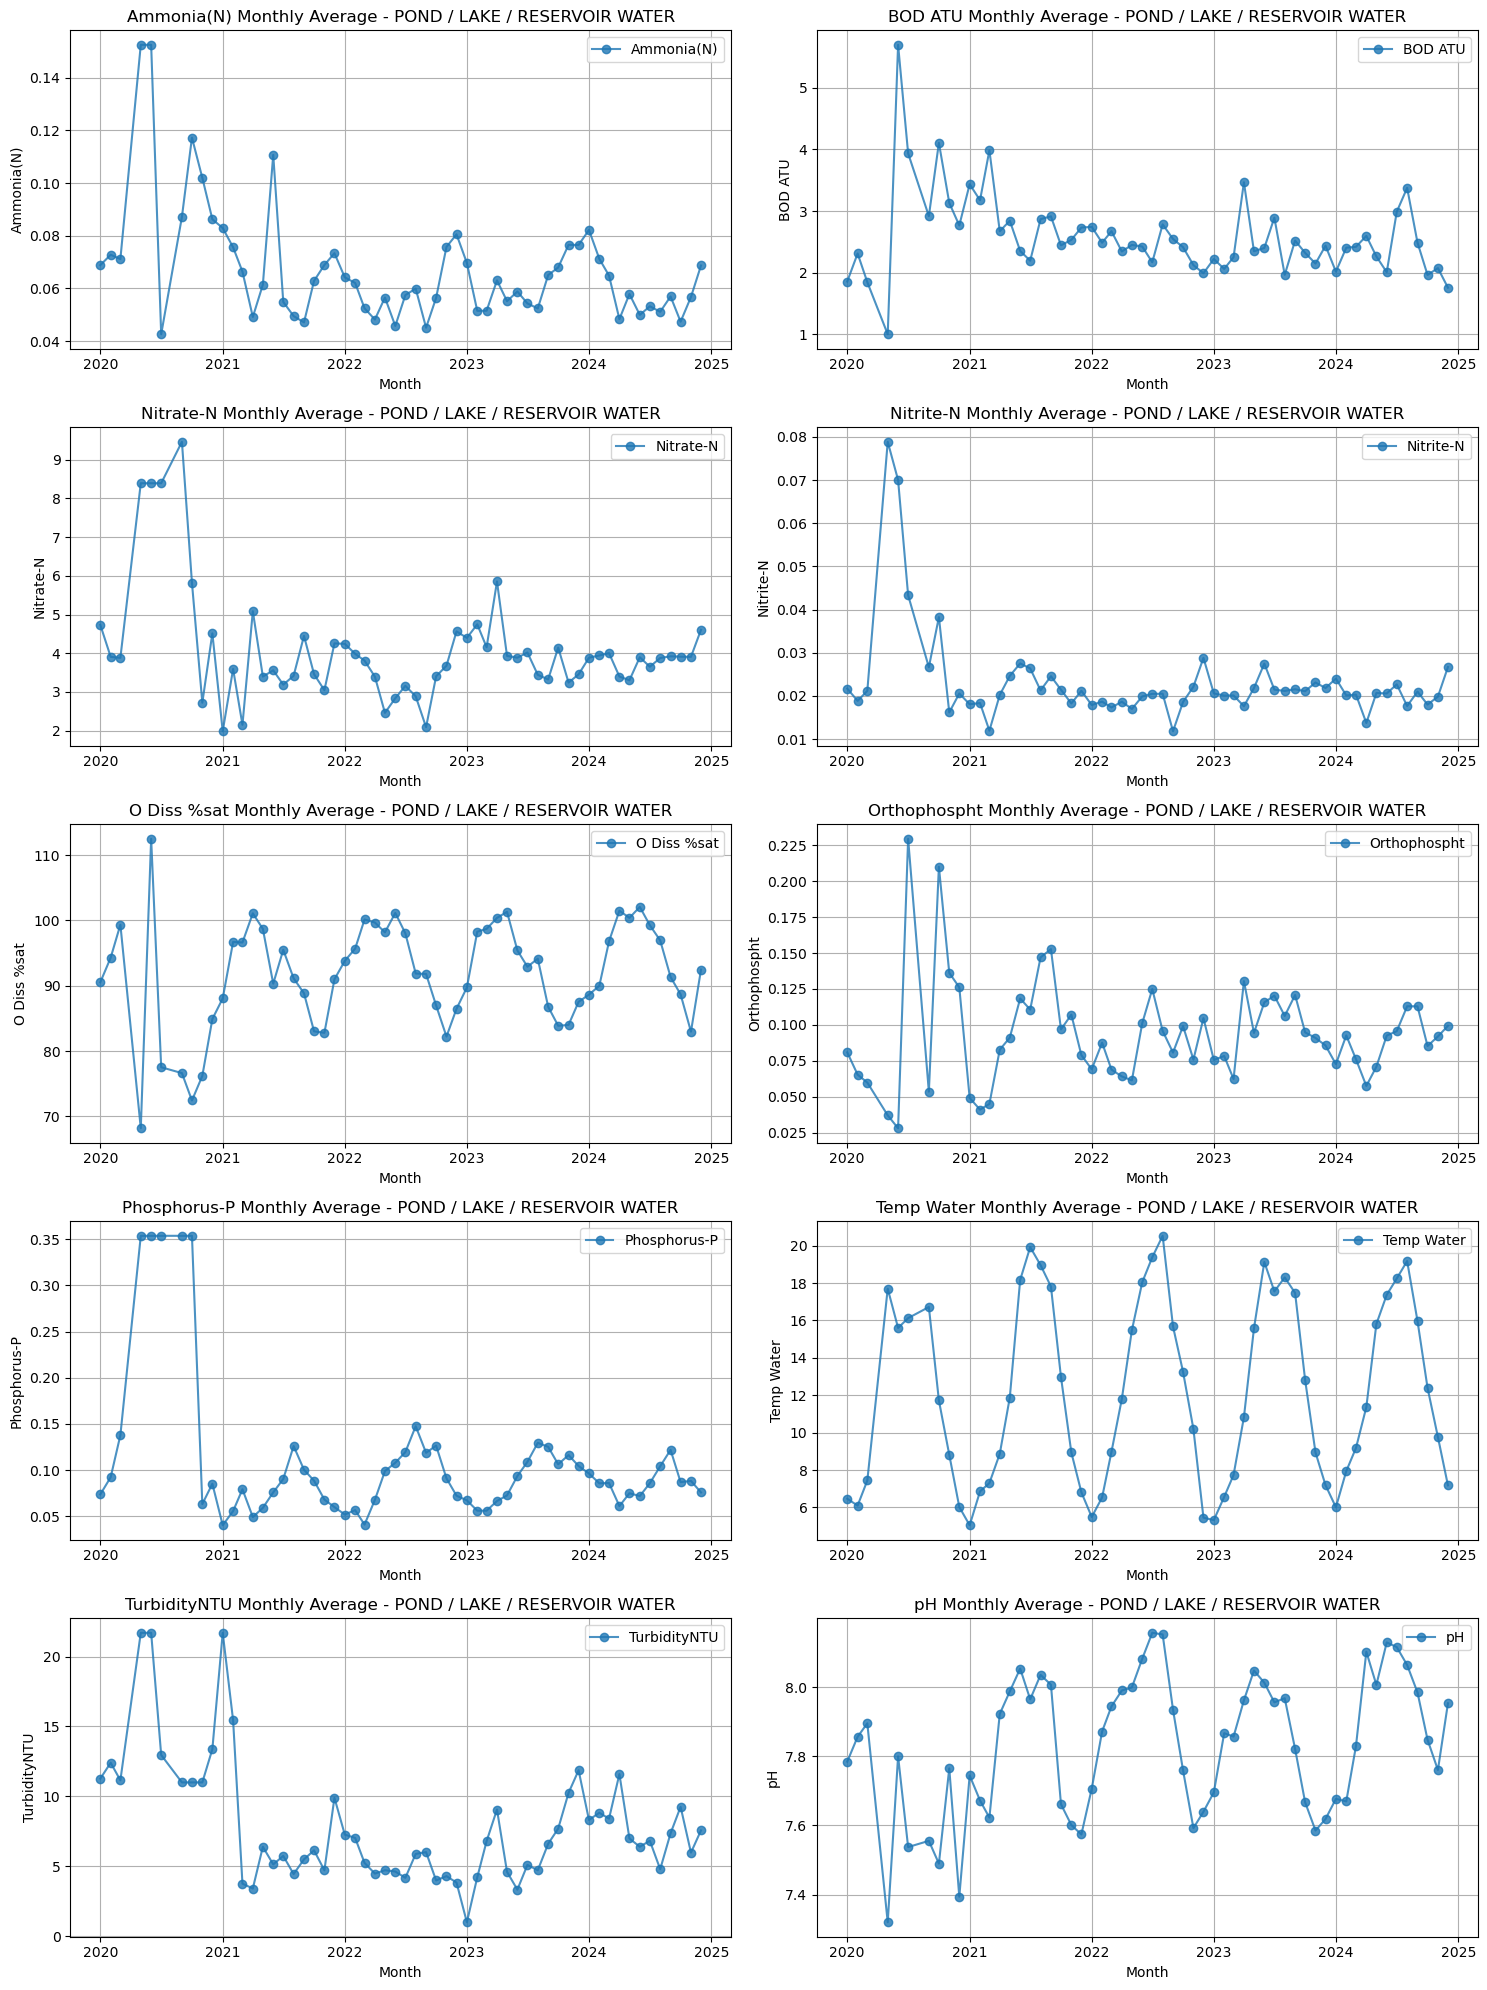

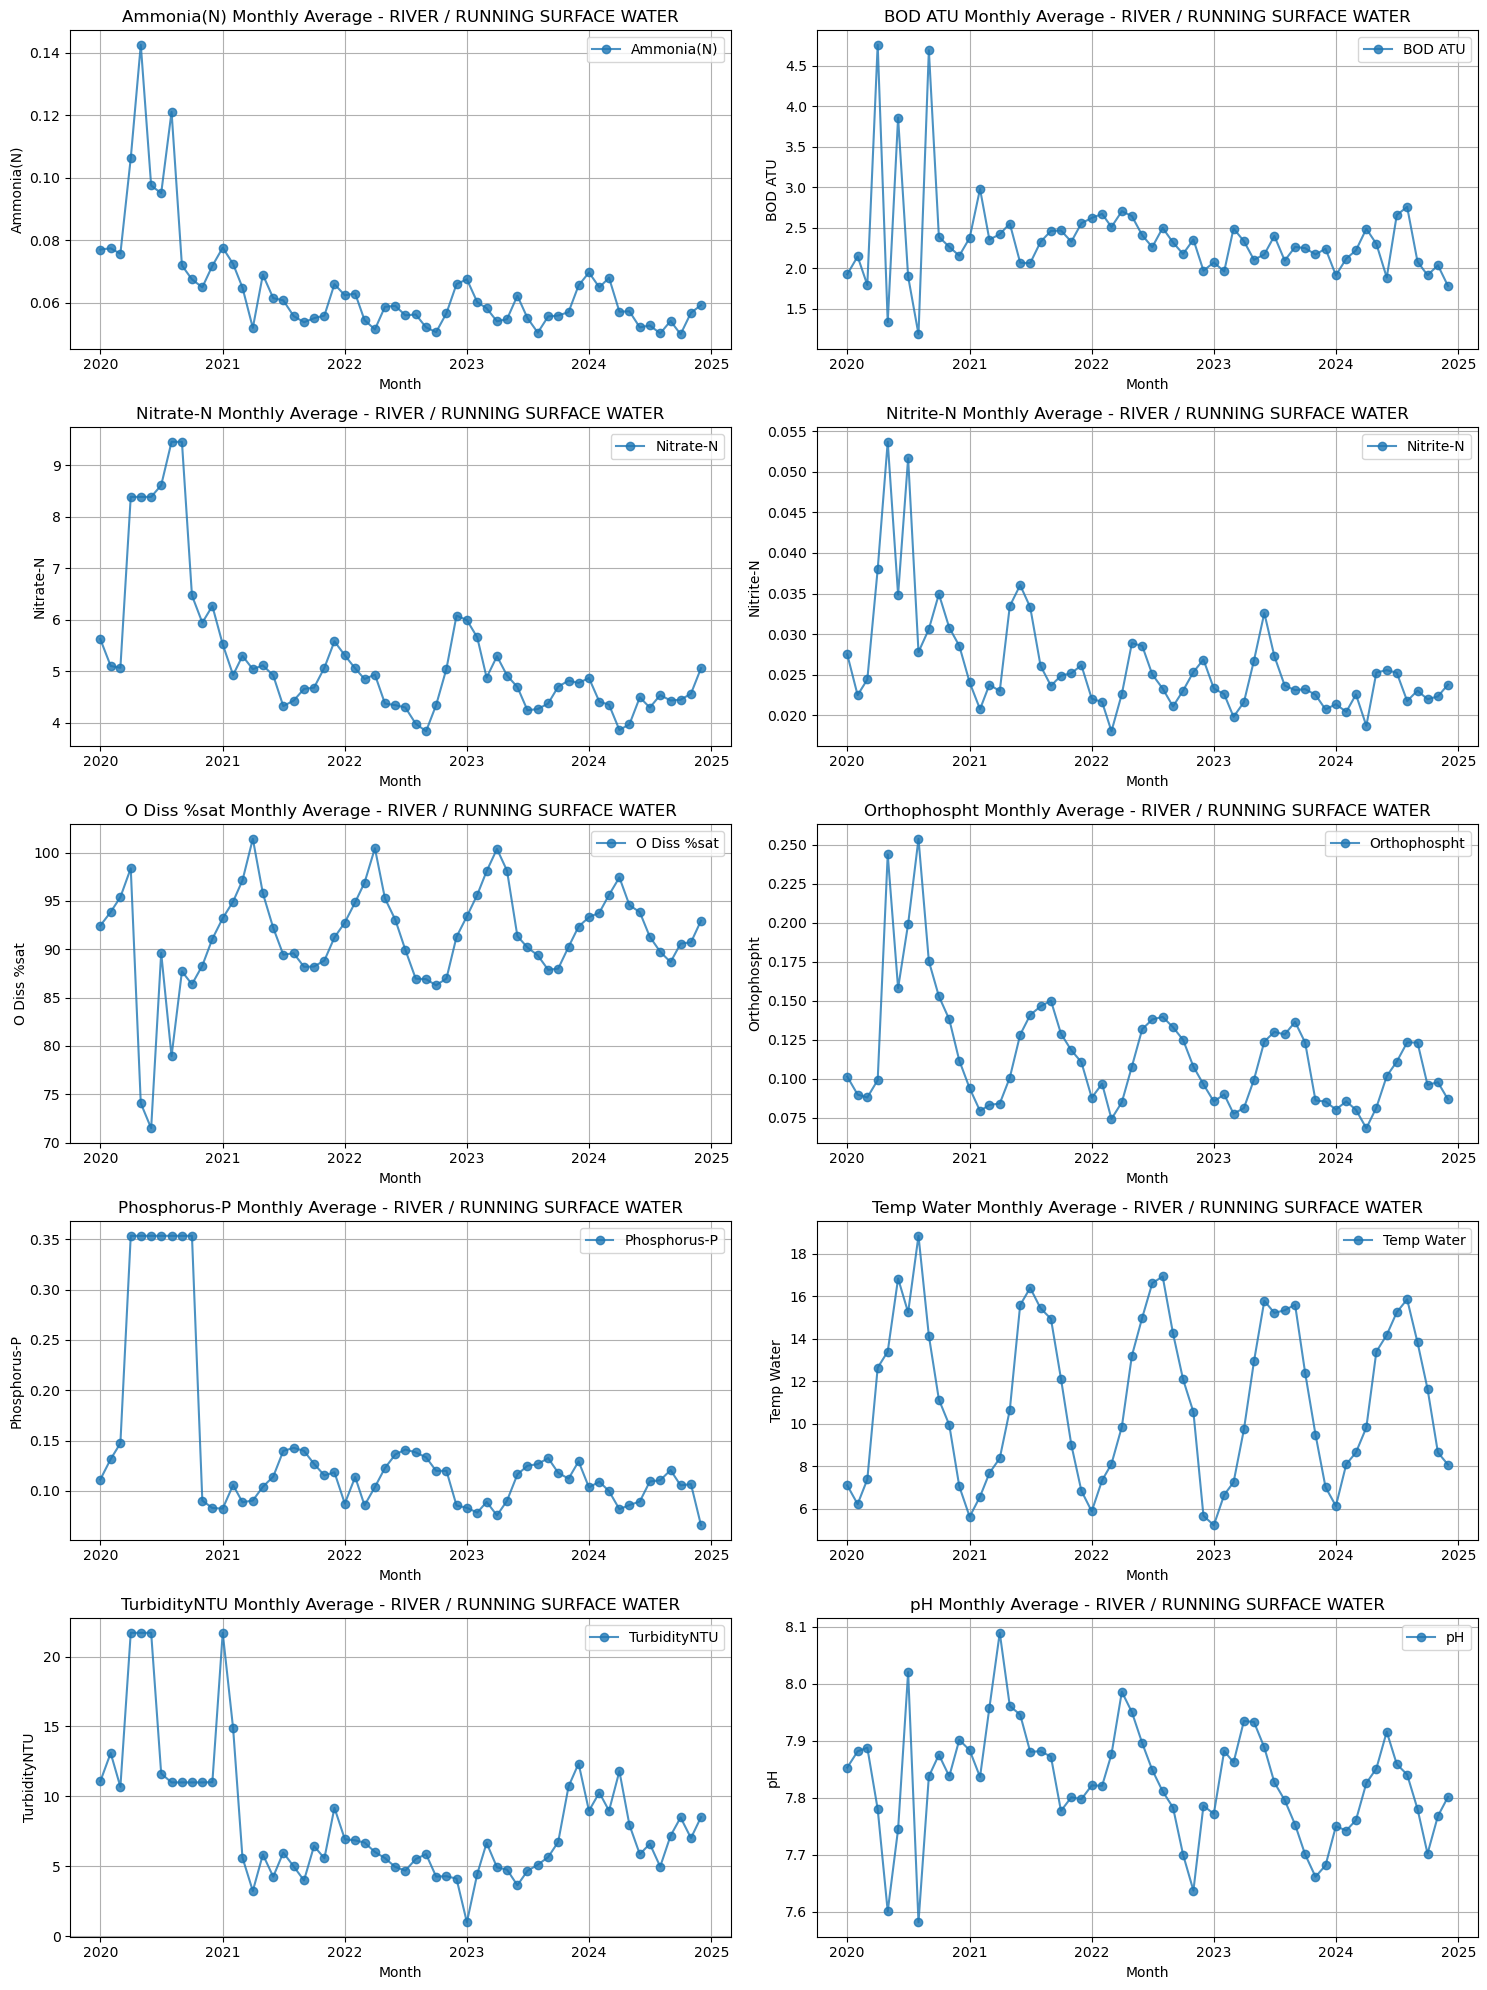

In [18]:

# Step 1: Create a new column 'month_date' that represents the first day of each month.
df['month_date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Step 2: Group by both 'month_date' and water type to calculate the mean for each parameter.
monthly_df = df.groupby(['month_date', 'sample.sampledMaterialType.label'])[parameters].mean().reset_index()

# Sort the monthly_df by month_date (and water type if needed)
monthly_df.sort_values(['month_date', 'sample.sampledMaterialType.label'], inplace=True)

# Step 3: Identify unique water types.
water_types = monthly_df['sample.sampledMaterialType.label'].unique()

# Step 4: For each water type, plot the monthly trends for each parameter.
for water_type in water_types:
    # Subset the DataFrame for the current water type.
    subset = monthly_df[monthly_df['sample.sampledMaterialType.label'] == water_type]
    
    # Create subplots grid for the parameters (e.g., 5 rows x 2 columns if you have 10 parameters).
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    axs = axs.flatten()  # Flatten the array for easier iteration.
    
    # Loop through each parameter and plot its monthly mean trend.
    for i, param in enumerate(parameters):
        axs[i].plot(subset['month_date'], subset[param], marker='o', linestyle='-', alpha=0.8, label=param)
        axs[i].set_title(f'{param} Monthly Average - {water_type}')
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(param)
        axs[i].legend()
        axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()

In [ ]:

yearly_df = df.groupby('year')[parameters].mean().reset_index()

yearly_df.sort_values('year', inplace=True)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axs = axs.flatten()  # Flatten the 2D array for easier iteration

# Loop through each parameter and plot its yearly average values.
for i, param in enumerate(parameters):
    axs[i].plot(yearly_df['year'], yearly_df[param], marker='o', linestyle='-', alpha=0.8, label=param)
    axs[i].set_title(f'{param} Yearly Values')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(param)
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()

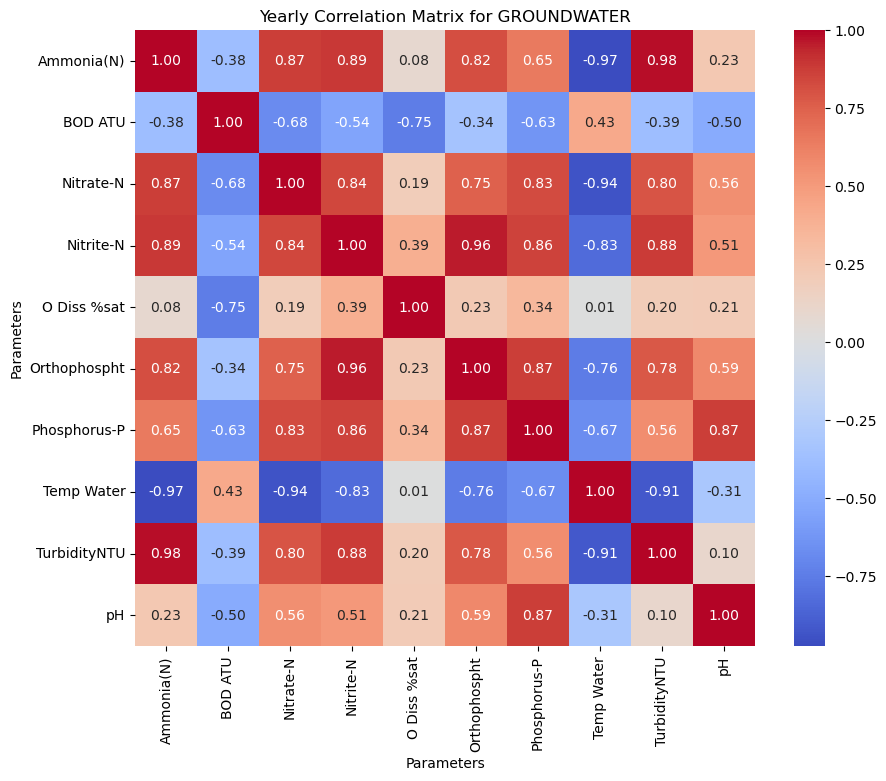

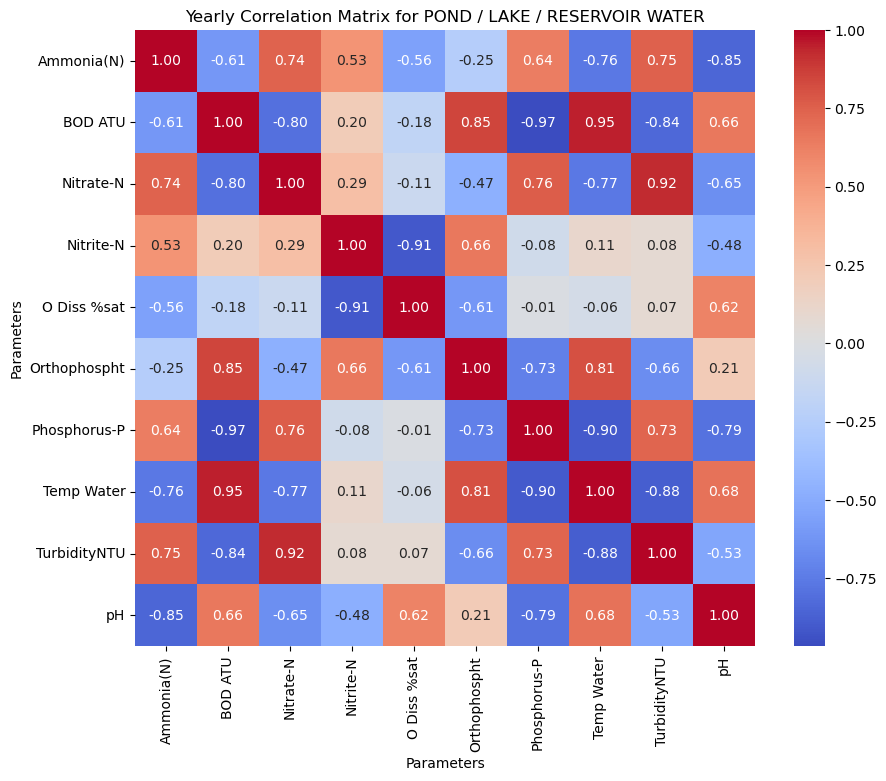

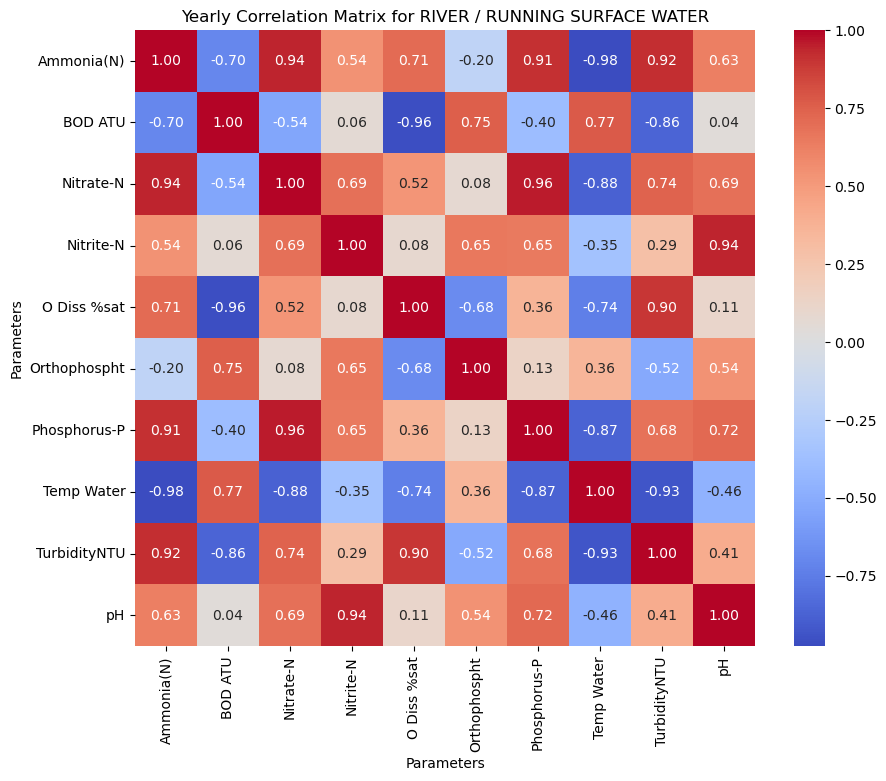

In [12]:
# Step 1: Create a yearly DataFrame that groups by both year and water type.
yearly_by_water = df.groupby(['year', 'sample.sampledMaterialType.label'])[parameters].mean().reset_index()

# Step 2: Identify unique water types.
water_types = yearly_by_water['sample.sampledMaterialType.label'].unique()

# Step 3: Loop over each water type, compute its correlation matrix, and plot it.
for wt in water_types:
    # Subset the data for the current water type.
    subset = yearly_by_water[yearly_by_water['sample.sampledMaterialType.label'] == wt]
    
    # Compute the correlation matrix for the water quality parameters.
    corr_matrix = subset[parameters].corr()
    
    # Create a heatmap for the correlation matrix.
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Yearly Correlation Matrix for {wt}')
    plt.xlabel('Parameters')
    plt.ylabel('Parameters')
    plt.show()

In [ ]:
# Example ideal ranges (modify these with proper values for your case)
# Adjusted ideal ranges for mixed water sources
ideal_ranges = {
    'Ammonia(N)':      {'min': 0.0,  'max': 1.0},   # mg/L (combined groundwater & surface water)
    'BOD ATU':         {'min': 0.0,  'max': 4.0},   # mg/L (higher than drinking water, but realistic for rivers/lakes)
    'Nitrate-N':       {'min': 0.0,  'max': 30.0},  # mg/L (accounts for river pollution but stays below extreme levels)
    'Nitrite-N':       {'min': 0.0,  'max': 0.3},   # mg/L (slightly above drinking water limit to allow for natural variance)
    'O Diss %sat':     {'min': 50,   'max': 120},   # % (oxygen variation in natural waters)
    'Orthophospht':    {'min': 0.0,  'max': 2.0},   # mg/L (to account for agricultural runoff in some sources)
    'Phosphorus-P':    {'min': 0.0,  'max': 0.15},  # mg/L (higher than drinking water limit but within natural ranges)
    'Temp Water':      {'min': 0.0,  'max': 30.0},  # °C (covers groundwater & river/lake seasonal changes)
    'TurbidityNTU':    {'min': 0.0,  'max': 20.0},  # NTU (since mixed sources include rivers, which are naturally higher)
    'pH':              {'min': 6.0,  'max': 9.0}    # pH scale (general range covering all sources)
}

# Example weights (summing to 1, or use relative weights)
weights = {
    'Ammonia(N)':      0.1,
    'BOD ATU':         0.1,
    'Nitrate-N':       0.1,
    'Nitrite-N':       0.1,
    'O Diss %sat':     0.15,
    'Orthophospht':    0.1,
    'Phosphorus-P':    0.1,
    'Temp Water':      0.1,
    'TurbidityNTU':    0.1,
    'pH':              0.05
}

In [ ]:
import numpy as np

def calc_parameter_score(value, ideal_range, k=3):
    """
    Compute a normalized score for a parameter value given its ideal range.
    
    - If the value is within the ideal range, the score is 1.
    - If the value is below the ideal range, the relative deviation is
      computed as (min_val - value) / min_val.
    - If the value is above the ideal range, the relative deviation is
      computed as (value - max_val) / max_val.
    
    The final score is calculated as:
        score = exp(-k * deviation)
    where k is a decay constant (adjustable) that reflects the gravity of the deviation.
    
    This returns a score between 0 and 1.
    """
    min_val = ideal_range['min']
    max_val = ideal_range['max']
    
    if min_val <= value <= max_val:
        return 1.0
    else:
        if value < min_val:
            deviation = (min_val - value) / (min_val if min_val != 0 else 1)
        else:  # value > max_val
            deviation = (value - max_val) / (max_val if max_val != 0 else 1)
        
        # Exponential decay to penalize larger deviations more severely.
        score = np.exp(-k * deviation)
        return score

In [ ]:
def compute_water_quality_score(row, ideal_ranges, weights, k=3):
    """
    Compute an overall water quality score for a given row.
    
    For each parameter, calculate a normalized score using calc_parameter_score,
    then combine the scores using a weighted average.
    
    Returns a score between 0 and 1.
    """
    score_sum = 0
    total_weight = 0
    
    for param, crit in ideal_ranges.items():
        value = row[param]
        param_score = calc_parameter_score(value, crit, k=k)
        weight = weights.get(param, 1)  # Default weight is 1 if not specified.
        score_sum += param_score * weight
        total_weight += weight
    
    return score_sum / total_weight if total_weight > 0 else 0

# Apply the function to each row of the DataFrame.
df['water_quality_score'] = df.apply(lambda row: compute_water_quality_score(row, ideal_ranges, weights, k=3), axis=1)

In [ ]:
df.to_csv('final_water_quality_score_.csv', index=False)

In [ ]:
# Group by the 'date' column and compute the mean water quality score
daily_avg = df.groupby('date')['water_quality_score'].mean().reset_index()

# Plot the daily average water quality score over time
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['water_quality_score'], marker='o', linestyle='-')
plt.title("Daily Average Water Quality Score Over Time")
plt.xlabel("Date")
plt.ylabel("Water Quality Score")
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import pandas as pd

# Example: Define ideal ranges for each water quality parameter, separately for each water type.
ideal_ranges_by_water = {
    'GROUNDWATER': {
        'Ammonia(N)':      {'min': 0.0,  'max': 0.5},    # Example values for groundwater
        'BOD ATU':         {'min': 0.0,  'max': 2.0},
        'Nitrate-N':       {'min': 0.0,  'max': 10.0},
        'Nitrite-N':       {'min': 0.0,  'max': 0.1},
        'O Diss %sat':     {'min': 80,   'max': 100},
        'Orthophospht':    {'min': 0.0,  'max': 0.5},
        'Phosphorus-P':    {'min': 0.0,  'max': 0.05},
        'Temp Water':      {'min': 5.0,  'max': 25.0},
        'TurbidityNTU':    {'min': 0.0,  'max': 5.0},
        'pH':              {'min': 6.5,  'max': 8.5}
    },
    'RIVER / RUNNING SURFACE WATER': {
        'Ammonia(N)':      {'min': 0.0,  'max': 1.0},
        'BOD ATU':         {'min': 0.0,  'max': 4.0},
        'Nitrate-N':       {'min': 0.0,  'max': 30.0},
        'Nitrite-N':       {'min': 0.0,  'max': 0.3},
        'O Diss %sat':     {'min': 50,   'max': 120},
        'Orthophospht':    {'min': 0.0,  'max': 2.0},
        'Phosphorus-P':    {'min': 0.0,  'max': 0.15},
        'Temp Water':      {'min': 0.0,  'max': 30.0},
        'TurbidityNTU':    {'min': 0.0,  'max': 20.0},
        'pH':              {'min': 6.0,  'max': 9.0}
    },
    'POND / LAKE / RESERVOIR WATER': {
        'Ammonia(N)':      {'min': 0.0,  'max': 0.8},
        'BOD ATU':         {'min': 0.0,  'max': 3.0},
        'Nitrate-N':       {'min': 0.0,  'max': 20.0},
        'Nitrite-N':       {'min': 0.0,  'max': 0.2},
        'O Diss %sat':     {'min': 60,   'max': 110},
        'Orthophospht':    {'min': 0.0,  'max': 1.5},
        'Phosphorus-P':    {'min': 0.0,  'max': 0.1},
        'Temp Water':      {'min': 0.0,  'max': 28.0},
        'TurbidityNTU':    {'min': 0.0,  'max': 15.0},
        'pH':              {'min': 6.5,  'max': 9.0}
    }
}

# Example parameter weights (these weights indicate relative importance, summing to 1)
weights = {
    'Ammonia(N)':      0.1,
    'BOD ATU':         0.1,
    'Nitrate-N':       0.1,
    'Nitrite-N':       0.1,
    'O Diss %sat':     0.15,
    'Orthophospht':    0.1,
    'Phosphorus-P':    0.1,
    'Temp Water':      0.1,
    'TurbidityNTU':    0.1,
    'pH':              0.05
}

# Function to compute the score for a single parameter value based on its ideal range.
def calc_parameter_score(value, ideal_range, k=3):
    """
    If value is within the ideal range, score is 1.
    If not, compute relative deviation and use an exponential decay function:
       score = exp(-k * deviation)
    Returns a score between 0 and 1.
    """
    min_val = ideal_range['min']
    max_val = ideal_range['max']
    
    if min_val <= value <= max_val:
        return 1.0
    else:
        if value < min_val:
            deviation = (min_val - value) / (min_val if min_val != 0 else 1)
        else:  # value > max_val
            deviation = (value - max_val) / (max_val if max_val != 0 else 1)
        score = np.exp(-k * deviation)
        return score

# Function to compute the overall water quality score for a given row,
# using the ideal ranges specific to the water type of that row.
def compute_water_quality_score_by_type(row, ideal_ranges_by_water, weights, k=3):
    water_type = row['sample.sampledMaterialType.label']
    score_sum = 0
    total_weight = 0
    
    # Loop through each parameter in our ideal_ranges.
    for param, weight in weights.items():
        # Get the ideal range for the parameter for the current water type.
        ideal_range = ideal_ranges_by_water[water_type][param]
        value = row[param]
        param_score = calc_parameter_score(value, ideal_range, k)
        score_sum += param_score * weight
        total_weight += weight
    
    return score_sum / total_weight if total_weight > 0 else 0

# Apply the function to each row in the DataFrame.
# 'df' should be your DataFrame containing the water quality parameters and water type column.
df['water_quality_score'] = df.apply(lambda row: compute_water_quality_score_by_type(row, ideal_ranges_by_water, weights, k=3), axis=1)

# The resulting 'water_quality_score' column contains a normalized score (between 0 and 1)
# for each sample, where 1 indicates the parameter values are within the ideal ranges,
# and lower scores indicate larger deviations.

In [27]:
df.head(40)

sample.sampleDateTime  sample.samplingPoint.easting  \
0    2020-01-02 08:20:00                        512248   
1    2020-01-02 11:25:00                        512242   
2    2020-01-02 11:33:00                        479766   
3    2020-01-02 12:12:00                        271427   
4    2020-01-02 12:27:00                        473010   
5    2020-01-02 12:46:00                        478160   
6    2020-01-03 08:50:00                        512245   
7    2020-01-03 08:55:00                        512244   
8    2020-01-03 11:10:00                        500000   
9    2020-01-03 11:15:00                        604515   
10   2020-01-03 11:31:00                        500000   
11   2020-01-03 11:39:00                        244360   
12   2020-01-03 11:45:00                        600000   
13   2020-01-03 12:15:00                        500000   
14   2020-01-03 12:15:00                        604495   
15   2020-01-03 13:25:00                        604540   
16   2020-01-03 13:35:00                        600000   
17   2020-01-03 14:05:00                        484160   
18   2020-01-03 15:50:00                        368500   
19   2020-01-03 16:50:00                        368500   
20   2020-01-05 11:10:00                        560000   
21   2020-01-06 07:58:00                        415855   
22   2020-01-06 07:59:00                        399885   
23   2020-01-06 08:03:00                        516196   
24   2020-01-06 08:07:00                        418707   
25   2020-01-06 08:08:00                        575900   
26   2020-01-06 08:10:00                        506637   
27   2020-01-06 08:12:00                        400072   
28   2020-01-06 08:14:00                        410676   
29   2020-01-06 08:16:00                        516118   
30   2020-01-06 08:17:00                        600109   
31   2020-01-06 08:19:00                        514860   
32   2020-01-06 08:28:00                        573757   
33   2020-01-06 08:29:00                        346800   
34   2020-01-06 08:31:00                        462064   
35   2020-01-06 08:31:00                        419133   
36   2020-01-06 08:39:00                        462152   
37   2020-01-06 08:40:00                        572733   
38   2020-01-06 08:43:00                        416780   
39   2020-01-06 08:43:00                        547878   

    sample.samplingPoint.northing sample.sampledMaterialType.label  \
0                          302927                      GROUNDWATER   
1                          302941                      GROUNDWATER   
2                          150096    RIVER / RUNNING SURFACE WATER   
3                           47251    RIVER / RUNNING SURFACE WATER   
4                          140000    RIVER / RUNNING SURFACE WATER   
5                          137000    RIVER / RUNNING SURFACE WATER   
6                          302928                      GROUNDWATER   
7                          302928                      GROUNDWATER   
8                               2    RIVER / RUNNING SURFACE WATER   
9                          222393    POND / LAKE / RESERVOIR WATER   
10                              2    RIVER / RUNNING SURFACE WATER   
11                         124690    POND / LAKE / RESERVOIR WATER   
12                         220000    POND / LAKE / RESERVOIR WATER   
13                              4    RIVER / RUNNING SURFACE WATER   
14                         222258    POND / LAKE / RESERVOIR WATER   
15                         222481    RIVER / RUNNING SURFACE WATER   
16                         220000    RIVER / RUNNING SURFACE WATER   
17                         380980    RIVER / RUNNING SURFACE WATER   
18                         155500    RIVER / RUNNING SURFACE WATER   
19                         155500    RIVER / RUNNING SURFACE WATER   
20                         310000    RIVER / RUNNING SURFACE WATER   
21                         537065    RIVER / RUNNING SURFACE WATER   
22            

In [ ]:


# Group the DataFrame by 'month_date' and calculate the mean water quality score.
monthly_avg_score = df.groupby('month_date')['water_quality_score'].mean().reset_index()

# Sort the monthly DataFrame by 'month_date' to ensure chronological order.
monthly_avg_score.sort_values('month_date', inplace=True)

# Plot the monthly average water quality score over time.
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_score['month_date'], monthly_avg_score['water_quality_score'], 
         marker='o', linestyle='-', alpha=0.8)
plt.title("Monthly Average Water Quality Score Over Time")
plt.xlabel("Month")
plt.ylabel("Water Quality Score")
plt.grid(True)
plt.show()

In [ ]:
# Group the DataFrame by 'year' and calculate the mean water quality score for each year.
yearly_avg_score = df.groupby('year')['water_quality_score'].mean().reset_index()

# Sort the aggregated DataFrame by 'year' to ensure chronological order.
yearly_avg_score.sort_values('year', inplace=True)

# Plot the yearly average water quality score over time.
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_score['year'], yearly_avg_score['water_quality_score'], 
         marker='o', linestyle='-', alpha=0.8)
plt.title("Yearly Average Water Quality Score Over Time")
plt.xlabel("Year")
plt.ylabel("Water Quality Score")
plt.grid(True)
plt.show()

In [ ]:
# Group the DataFrame by location (Easting and Northing) and compute the mean water quality score.
location_summary = df.groupby(['sample.samplingPoint.easting', 'sample.samplingPoint.northing'])['water_quality_score'].mean().reset_index()

# Now location_summary contains one row per unique location with the average water quality score.
print(location_summary.head())

In [ ]:
import pandas as pd
import folium
from pyproj import Transformer
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Step 1: Aggregating the water quality score by location ---
# Group by unique locations (using Easting and Northing) and average the water_quality_score.
location_summary = df.groupby(['sample.samplingPoint.easting', 'sample.samplingPoint.northing'])['water_quality_score'].mean().reset_index()

# --- Step 2: Convert Easting/Northing to Latitude/Longitude ---

transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True)

def convert_coords(easting, northing):
    # transformer.transform returns (longitude, latitude)
    lon, lat = transformer.transform(easting, northing)
    return lat, lon

# Apply the conversion function to each row of location_summary.
location_summary['lat'], location_summary['lon'] = zip(*location_summary.apply(
    lambda row: convert_coords(row['sample.samplingPoint.easting'], row['sample.samplingPoint.northing']),
    axis=1
))

# --- Step 3: Create a Color Mapping for the Water Quality Score ---
colormap = plt.get_cmap('RdYlGn') 

def score_to_hex(score):
    """
    Converts a water quality score (0 to 1) to a hex color.
    """
    # The colormap expects a value in the range [0, 1]. A score of 0 will be red, 1 will be green.
    rgba = colormap(score)  # returns an (R,G,B,A) tuple
    return mcolors.rgb2hex(rgba)

# --- Step 4: Create a Folium Map ---
# Center the map on the average location from the aggregated data.
avg_lat = location_summary['lat'].mean()
avg_lon = location_summary['lon'].mean()
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=10)

# --- Step 5: Add Circle Markers for Each Location ---
# Each marker's color reflects the water quality score.
for idx, row in location_summary.iterrows():
    color = score_to_hex(row['water_quality_score'])
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"Score: {row['water_quality_score']:.2f}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m) 

# --- Step 6: Display the Map ---
# Save the map to an HTML file and display it.
m.save('water_quality_map.html')
m